In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from sklearn.preprocessing import StandardScaler
import warnings
from sklearn.cluster import KMeans
from scipy import stats

!pip install dataprep -q
from dataprep.eda import create_report

     |████████████████████████████████| 9.5 MB 5.5 MB/s 
     |████████████████████████████████| 28.5 MB 1.8 MB/s 
     |████████████████████████████████| 78 kB 6.5 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 101 kB 8.6 MB/s 
     |████████████████████████████████| 133 kB 49.7 MB/s 
     |████████████████████████████████| 1.0 MB 53.1 MB/s 
     |████████████████████████████████| 943 kB 51.2 MB/s 
     |████████████████████████████████| 749 kB 50.2 MB/s 
     |████████████████████████████████| 965 kB 59.8 MB/s 
     |████████████████████████████████| 50 kB 5.1 MB/s 
     |████████████████████████████████| 232 kB 56.7 MB/s 
     |████████████████████████████████| 96 kB 4.8 MB/s 
     |████████████████████████████████| 1.6 MB 48.9 MB/s 
     |████████████████████████████████| 49 kB 4.9 MB/s 
ERROR: pip's dependency resolver does not currently take into account al

In [2]:
#Tabelas

dim_sellers = pd.read_csv('/content/olist_sellers_dataset.csv')
ft_order = pd.read_csv('/content/olist_orders_dataset.csv')
ft_order_item = pd.read_csv('/content/olist_order_items_dataset.csv')
dim_product = pd.read_csv('/content/olist_products_dataset.csv')
ft_reviews = pd.read_csv('/content/olist_order_reviews_dataset.csv')
dim_payments = pd.read_csv('/content/olist_order_payments_dataset.csv')
dim_geo = pd.read_csv('/content/olist_geolocation_dataset.csv')
dim_customers = pd.read_csv('/content/olist_customers_dataset.csv')
dim_category = pd.read_csv('/content/product_category_name_translation.csv')


In [3]:
#alterando o nome das colunas zip
dim_customers = dim_customers.rename(columns={'customer_zip_code_prefix':'zip_code'})
dim_geo = dim_geo.rename(columns={'geolocation_zip_code_prefix':'zip_code'})


In [4]:
ft_order.head(1)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00


In [5]:
#juntando as tabelas
df = ft_order.merge(dim_customers, on='customer_id').merge(ft_order_item, on='order_id').merge(dim_product, on='product_id').merge(dim_sellers, on='seller_id').merge(dim_payments, on='order_id').merge(ft_reviews, on='order_id').merge(dim_category, on='product_category_name')
df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,zip_code,...,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,product_category_name_english
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,credit_card,1,18.12,a54f0611adc9ed256b57ede6b6eb5114,4,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,housewares
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,voucher,1,2.00,a54f0611adc9ed256b57ede6b6eb5114,4,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,housewares
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,voucher,1,18.59,a54f0611adc9ed256b57ede6b6eb5114,4,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,housewares
3,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,delivered,2017-08-15 18:29:31,2017-08-15 20:05:16,2017-08-17 15:28:33,2017-08-18 14:44:43,2017-08-28 00:00:00,3a51803cc0d012c3b5dc8b7528cb05f7,3366,...,credit_card,3,37.77,b46f1e34512b0f4c74a72398b03ca788,4,NaN,Deveriam embalar melhor o produto. A caixa vei...,2017-08-19 00:00:00,2017-08-20 15:16:36,housewares
4,0e7e841ddf8f8f2de2bad69267ecfbcf,26c7ac168e1433912a51b924fbd34d34,delivered,2017-08-02 18:24:47,2017-08-02 18:43:15,2017-08-04 17:35:43,2017-08-07 18:30:01,2017-08-15 00:00:00,ef0996a1a279c26e7ecbd737be23d235,2290,...,credit_card,1,37.77,dc90f19c2806f1abba9e72ad3c350073,5,NaN,"Só achei ela pequena pra seis xícaras ,mais é ...",2017-08-08 00:00:00,2017-08-08 23:26:23,housewares


5    57.0
4    19.0
1    13.0
3     8.0
2     3.0
Name: review_score, dtype: float64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


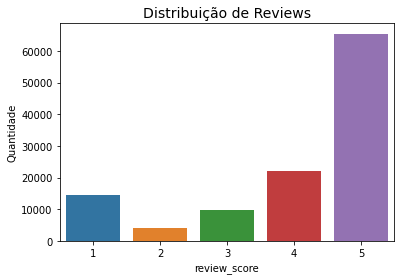

In [6]:
# Distribuição do score de review

print((df['review_score'].value_counts()/df.shape[0]*100).round())
s = sns.countplot(df['review_score'])
s.set_title('Distribuição de Reviews', size=14)
s.set_ylabel('Quantidade')

plt.show()

In [7]:
#Clientes que mais contribuiem para o faturamento
topNclientes = df.groupby(df['customer_unique_id'])['payment_value'].sum().reset_index().sort_values('payment_value', ascending=False)
topNclientes.rename(columns={'payment_value':'total_pago'}, inplace=True)
topNclientes.head()

,customer_unique_id,total_pago
3724,0a0a92112bd4c708ca5fde585afaa872,109312.64
71634,c402f431464c72e27330a67f7b94d4fb,44048.00
23445,4007669dec559734d6f53e029e360987,36489.24
87489,ef8d54b3797ea4db1d63f0ced6a906e9,30186.00
43207,763c8b1c9c68a0229c42c9fc6f662b93,29099.52


Text(42000, 70, 'Aproximadamente 42% dos clientes contribuem com 80% do faturamento')

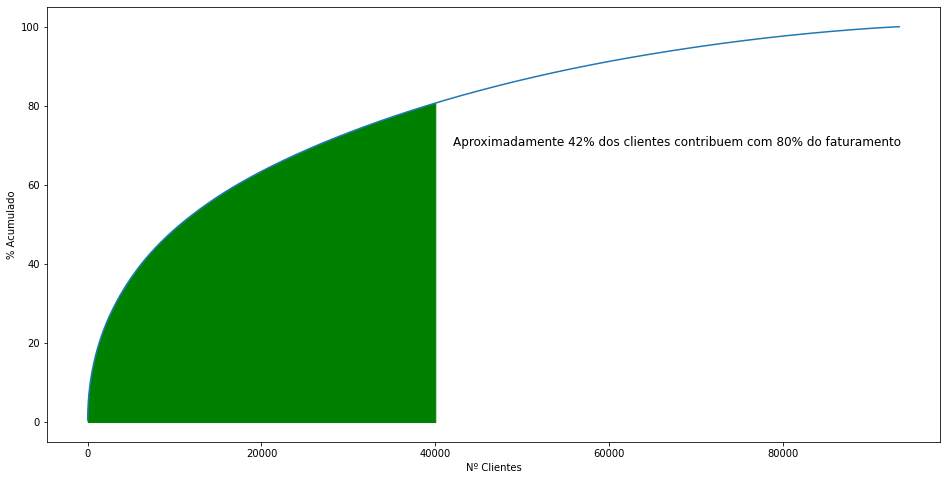

In [8]:
#Visualização top clientes

plt.figure(figsize=(16,8))
topNclientes['%_do_total'] = (topNclientes['total_pago'] / topNclientes['total_pago'].sum())*100
topNclientes['%_acumulado'] = topNclientes['%_do_total'].cumsum()

#Gerando grafico
ax = sns.lineplot(x=range(1, len(topNclientes['customer_unique_id'])+1), y=topNclientes['%_acumulado'])
ax.set_xlabel('Nº Clientes')
ax.set_ylabel('% Acumulado')

#Preenchimento da Area
a = np.arange(1,len(topNclientes)+1)
b = topNclientes['%_acumulado']

plt.fill_between(
    a, b, 0, 
    where = (a >= 0) & (a <= 40000),
    color = 'g'
)

ax.text(42000,70,"Aproximadamente 42% dos clientes contribuem com 80% do faturamento", fontsize=12)

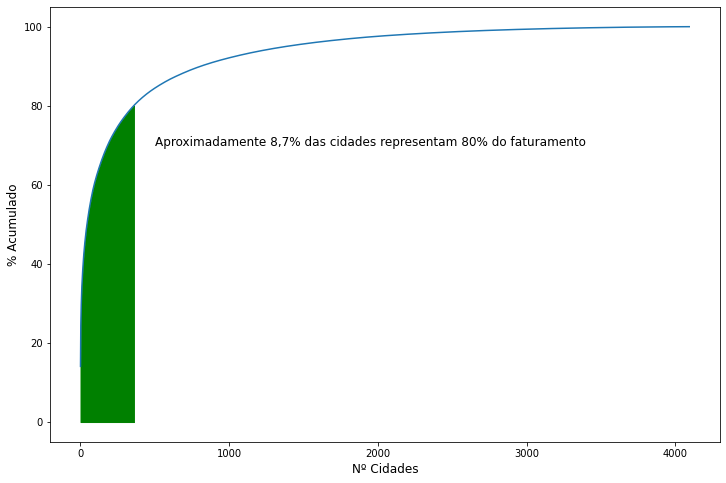

In [9]:
#Visualização top cidades

plt.figure(figsize=(12,8))

topNcidades = df.groupby('customer_city')['payment_value'].sum().reset_index().sort_values('payment_value', ascending=False)
topNcidades.rename(columns={'payment_value':'valor_pago'}, inplace=True)
topNcidades['%_do_total'] = (topNcidades['valor_pago']/ topNcidades['valor_pago'].sum())*100
topNcidades['%Acumulado'] = topNcidades['%_do_total'].cumsum()

az = sns.lineplot(x = range(1,len(topNcidades)+1),  y = topNcidades['%Acumulado'])
az.set_xlabel('Nº Cidades', fontsize=12)
az.set_ylabel('% Acumulado', fontsize=12)

c = np.arange(1,len(topNcidades)+1)
ac = topNcidades['%Acumulado']

plt.fill_between(c, ac, 0,
                 where = (c >= 0) & (c <= 360),
                 color = 'g')



az.text(500, 70, 'Aproximadamente 8,7% das cidades representam 80% do faturamento',fontsize=12)


plt.show()

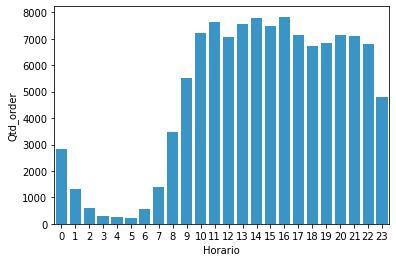

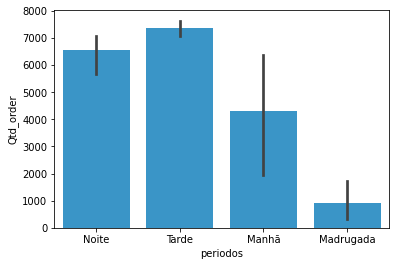

In [42]:
#ordens por horario

#convertendo coluna de data para datetime
coldata = ["order_purchase_timestamp", "order_approved_at", "order_delivered_carrier_date", 
            "order_delivered_customer_date", "order_estimated_delivery_date", "shipping_limit_date", 
            "review_creation_date", "review_answer_timestamp"]

for i in coldata:
  df[i] = pd.to_datetime(df[i])

#Ordenação por horas
vendas_horas = df.groupby(df['order_purchase_timestamp'].dt.hour)['order_id'].count().reset_index().sort_values('order_purchase_timestamp', ascending=False)
vendas_horas.rename(columns={'order_id':'Qtd_order', 'order_purchase_timestamp':'Horario'}, inplace=True)

#Adicionando coluna de periodo
def periodo(row):
  if (row['Horario'] >=6) & (row['Horario'] < 12):
    return 'Manhã'
  elif (row['Horario'] >=12) & (row['Horario'] < 19):
    return'Tarde'
  elif (row['Horario'] >=19) & (row['Horario'] <= 23):
    return 'Noite'
  else:
    return 'Madrugada'

vendas_horas = vendas_horas.assign(periodos=vendas_horas.apply(periodo, axis=1))

#Visualização dos dados por hora
periodo_ordens = sns.barplot(data = vendas_horas, x='Horario', y='Qtd_order', color='#239cde')
plt.show()

#Visualização dos dados por periodo
periodo_ordens = sns.barplot(data = vendas_horas, x='periodos', y='Qtd_order', color='#239cde')
plt.show()


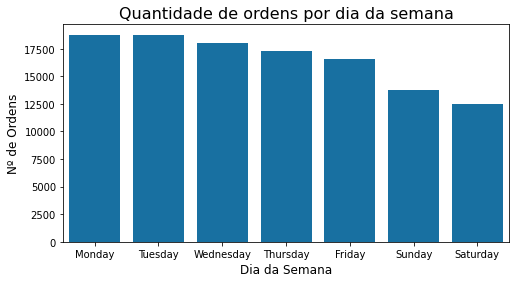

In [11]:
#Visualização por semana e periodo

order_week = df.groupby(df['order_purchase_timestamp'].dt.day_name())['order_id'].count().reset_index().sort_values('order_purchase_timestamp', ascending = False)
order_week.rename(columns={'order_purchase_timestamp':'Dia_semana', 'order_id':'Total_order'}, inplace=True)
order_week = order_week.sort_values('Total_order', ascending=False)

plt.figure(figsize=(8,4))
week = sns.barplot(data = order_week, x='Dia_semana', y='Total_order', color='#0177B8' )
week.set_xlabel('Dia da Semana', fontsize=12)
week.set_ylabel('Nº de Ordens', fontsize=12)
week.set_title('Quantidade de ordens por dia da semana', fontsize=16)

plt.show()

In [40]:
#Produtos mais bem avaliados e produtos com piores avaliações

reviews_prod = df.groupby(df['product_category_name_english'])['review_score'].agg(['count', 'mean']).reset_index().sort_values('mean', ascending=False)

melhores = reviews_prod[reviews_prod['count']>=30][:10]
piores = reviews_prod[reviews_prod['count']>=30].sort_values(by='mean')[:10]
melhores.rename(columns ={'count':'qtd_ordens'}, inplace=True)
melhores

,product_category_name_english,qtd_ordens,mean
8,books_general_interest,561,4.438503
9,books_imported,62,4.419355
35,flowers,31,4.419355
22,costruction_tools_tools,101,4.415842
10,books_technical,269,4.375465
37,food_drink,290,4.324138
64,small_appliances_home_oven_and_coffee,78,4.320513
53,luggage_accessories,1159,4.295945
32,fashion_sport,31,4.258065
36,food,511,4.228963


In [41]:
piores.rename(columns ={'count':'qtd_ordens'}, inplace=True)
piores

,product_category_name_english,qtd_ordens,mean
23,diapers_and_hygiene,39,3.256410
57,office_furniture,1773,3.526791
30,fashion_male_clothing,144,3.548611
34,fixed_telephony,269,3.672862
27,fashio_female_clothing,50,3.780000
41,furniture_mattress_and_upholstery,41,3.804878
4,audio,377,3.840849
38,furniture_bedroom,126,3.841270
58,party_supplies,46,3.847826
19,construction_tools_safety,198,3.848485


In [14]:
#Metodo de pagamento mais cancelado

cancel = pd.crosstab(df['payment_type'], df['order_status'])
cancel = cancel[['canceled','delivered']]
cancel['cancel%'] = (cancel['canceled']/cancel['delivered'])*100
cancel["Avg Cancelation Rate"] = (len(df[df['order_status'] == 'canceled'])/ len(df[df['order_status'] == 'delivered']))*100

cancel

order_status,canceled,delivered,cancel%,Avg Cancelation Rate
payment_type,,,,
boleto,92,22029,0.417631,0.473456
credit_card,411,83536,0.492003,0.473456
debit_card,6,1623,0.369686,0.473456
voucher,27,6022,0.448356,0.473456


In [15]:
#relação do tempo de entre com o review
df['tempo_entrega_horas'] = (df['order_delivered_customer_date'] - df['order_purchase_timestamp'])
df['tempo_entrega_horas'] = df['tempo_entrega_horas'].apply(lambda x:x.total_seconds())
df['tempo_entrega_horas'] = round((df['tempo_entrega_horas']/3600)/24,2)
df.rename(columns={'tempo_entrega_horas':'tempo_entrega_dias'}, inplace=True)

df['tempo_entrega_dias'].describe()

count    113209.000000
mean         12.442130
std           9.356005
min           0.530000
25%           6.740000
50%          10.190000
75%          15.500000
max         208.350000
Name: tempo_entrega_dias, dtype: float64

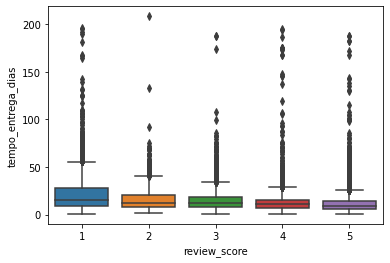

In [16]:
#Visualização de dias entrega x score review

sns.boxplot(data=df, x='review_score', y='tempo_entrega_dias')
plt.show()

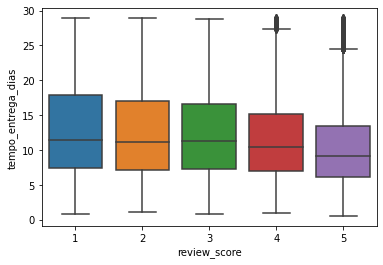

In [17]:
#Removendo outliers
out_alto =df['tempo_entrega_dias'].quantile(0.95)
df_sem_outliers = df[df['tempo_entrega_dias'] < out_alto]

sns.boxplot(data=df_sem_outliers, x='review_score', y='tempo_entrega_dias')
plt.show()

In [18]:
#Quais as cidades de vendedores com menor tempo de entrega

city_saller = df.groupby('seller_city')['tempo_entrega_dias'].agg(['min','max','mean','std','count']).dropna().sort_values('mean').reset_index()
city_saller = city_saller[city_saller['count'] >=30]
city_saller[:10]


,seller_city,min,max,mean,std,count
14,varzea paulista,2.58,21.07,5.877297,3.284975,37
41,hortolandia,1.39,71.09,7.587543,6.676258,350
53,ribeirao preto / sao paulo,2.45,27.32,7.944500,4.055726,40
60,rio claro,1.70,34.88,8.144035,6.283043,114
61,ferraz de vasconcelos,1.17,20.84,8.186316,6.443319,38
63,vicente de carvalho,1.54,42.43,8.309910,6.604570,221
67,poa,1.09,38.20,8.533029,6.005796,175
70,carazinho,3.16,19.13,8.640656,3.858348,61
79,betim,1.24,53.85,8.818312,6.242661,314
85,maua,1.51,42.57,8.977107,5.455932,484


In [19]:
# Média de score review pela cidade do vendedor

review_saller = df.groupby('seller_city')['review_score'].mean().reset_index().dropna().sort_values('review_score', ascending=False)
saller_score_city = city_saller.merge(review_saller, on='seller_city')
saller_score_city.head()

,seller_city,min,max,mean,std,count,review_score
0,varzea paulista,2.58,21.07,5.877297,3.284975,37,4.648649
1,hortolandia,1.39,71.09,7.587543,6.676258,350,4.323864
2,ribeirao preto / sao paulo,2.45,27.32,7.944500,4.055726,40,4.300000
3,rio claro,1.70,34.88,8.144035,6.283043,114,4.400000
4,ferraz de vasconcelos,1.17,20.84,8.186316,6.443319,38,3.675000


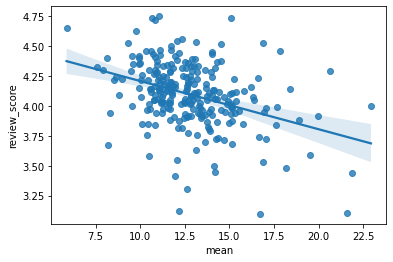

In [20]:
#Visualização média de entrega x média de score
sns.regplot(data=saller_score_city, x='mean', y='review_score')
plt.show()

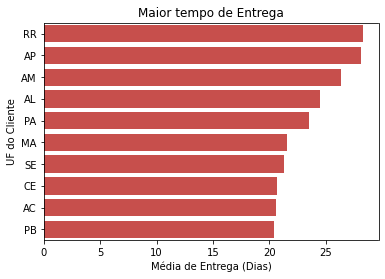

In [21]:
#maior tempo na entrega por cidade do cliente
cliente_uf_entrega_maior = df.groupby('customer_state')['tempo_entrega_dias'].mean().reset_index().sort_values('tempo_entrega_dias', ascending=False)[:10]

c_maior = sns.barplot(data=cliente_uf_entrega_maior, x='tempo_entrega_dias', y='customer_state', color='#DB3C38')
c_maior.set_title('Maior tempo de Entrega', size=12)
c_maior.set_xlabel('Média de Entrega (Dias)')
c_maior.set_ylabel('UF do Cliente')
plt.show()



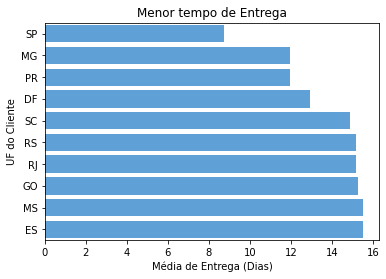

In [22]:
#Menor tempo na entrega por cidade do cliente
cliente_uf_entrega_menor = df.groupby('customer_state')['tempo_entrega_dias'].mean().reset_index().sort_values('tempo_entrega_dias', ascending=True)[:10]
c_menor = sns.barplot(data=cliente_uf_entrega_menor, x='tempo_entrega_dias', y='customer_state', color='#4BA2EB')
c_menor.set_title('Menor tempo de Entrega', size=12)
c_menor.set_xlabel('Média de Entrega (Dias)')
c_menor.set_ylabel('UF do Cliente')

plt.show()

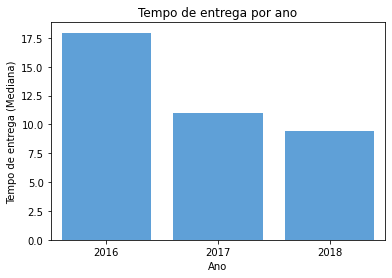

In [23]:
#Mediana do tempo de entrega por ano (Evolução)

tempo_entrega_ano = df.groupby(df['order_purchase_timestamp'].dt.year)['tempo_entrega_dias'].median().reset_index()
ano = sns.barplot(data=tempo_entrega_ano, x='order_purchase_timestamp', y='tempo_entrega_dias', color='#4BA2EB')
ano.set_title('Tempo de entrega por ano')
ano.set_ylabel('Tempo de entrega (Mediana)')
ano.set_xlabel('Ano')
plt.show()

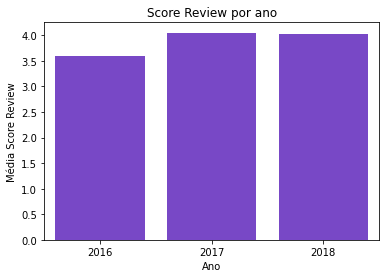

In [24]:
#Média do score review por ano (Evolução)
score_review_ano = df.groupby(df['order_purchase_timestamp'].dt.year)['review_score'].mean().reset_index()
score_ano = sns.barplot(data=score_review_ano, x='order_purchase_timestamp', y='review_score',color='#7333DB')
score_ano.set_title('Score Review por ano')
score_ano.set_xlabel('Ano')
score_ano.set_ylabel('Média Score Review')

plt.show()


In [25]:
#categoria de produtos que mais venderam
category_top10 = df.groupby('product_category_name_english').agg({'order_id': 'nunique', 'payment_value':'sum'}).reset_index().sort_values('payment_value', ascending=False)[:10]
category_top10.rename(columns={'product_category_name_english':'Categorias', 'order_id':'Qtde. Ordens', 'payment_value':'Valor Pago'}, inplace=True)
category_top10

,Categorias,Qtde. Ordens,Valor Pago
7,bed_bath_table,9313,1725465.67
43,health_beauty,8770,1646292.53
15,computers_accessories,6649,1592611.66
39,furniture_decor,6398,1427214.01
70,watches_gifts,5576,1420682.17
65,sports_leisure,7669,1390581.87
49,housewares,5843,1091709.15
42,garden_tools,3496,834757.45
5,auto,3877,802254.74
20,cool_stuff,3599,772616.70


### **RFM ANALYSIS**

In [26]:
#Calculando a recencia
recencia = df.groupby('customer_unique_id')['order_purchase_timestamp'].max().reset_index()
recencia.rename(columns={'order_purchase_timestamp':'ultima_Data_Compra', 'customer_unique_id':'Cliente_ID'}, inplace=True)
recencia['ultima_Data_Compra'] = recencia['ultima_Data_Compra'].dt.date

data_recente = df['order_purchase_timestamp'].dt.date.max()
recencia['Recencia'] = recencia['ultima_Data_Compra'].apply(lambda x: (data_recente-x).days)
recencia.head()

,Cliente_ID,ultima_Data_Compra,Recencia
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10,116
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07,119
2,0000f46a3911fa3c0805444483337064,2017-03-10,542
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10-12,326
4,0004aac84e0df4da2b147fca70cf8255,2017-11-14,293


In [27]:
#Calculando a frequencia
frequencia = df.groupby('customer_unique_id').agg({"order_id":"nunique"}).reset_index()
frequencia.rename(columns={'customer_unique_id':'Cliente_ID', 'order_id':'frequencia'}, inplace=True)
frequencia.head()


,Cliente_ID,frequencia
0,0000366f3b9a7992bf8c76cfdf3221e2,1
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1
2,0000f46a3911fa3c0805444483337064,1
3,0000f6ccb0745a6a4b88665a16c9f078,1
4,0004aac84e0df4da2b147fca70cf8255,1


In [28]:
#Calculando o valor
valor = df.groupby('customer_unique_id')['payment_value'].sum().reset_index()
valor.rename(columns={'customer_unique_id':'Cliente_ID', 'payment_value':'Valor Pago'}, inplace=True)
valor.head()


,Cliente_ID,Valor Pago
0,0000366f3b9a7992bf8c76cfdf3221e2,141.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,27.19
2,0000f46a3911fa3c0805444483337064,86.22
3,0000f6ccb0745a6a4b88665a16c9f078,43.62
4,0004aac84e0df4da2b147fca70cf8255,196.89


In [29]:
#uniando os datasets

df_rfm = recencia.merge(frequencia, on='Cliente_ID')
df_rfm = df_rfm.merge(valor, on='Cliente_ID').drop(columns='ultima_Data_Compra')
df_rfm.head()

,Cliente_ID,Recencia,frequencia,Valor Pago
0,0000366f3b9a7992bf8c76cfdf3221e2,116,1,141.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,119,1,27.19
2,0000f46a3911fa3c0805444483337064,542,1,86.22
3,0000f6ccb0745a6a4b88665a16c9f078,326,1,43.62
4,0004aac84e0df4da2b147fca70cf8255,293,1,196.89


In [30]:
#
def check_skew(df_skew, column):
    skew = stats.skew(df_skew[column])
    skewtest = stats.skewtest(df_skew[column])
    plt.title('Distribution of ' + column)
    sns.distplot(df_skew[column])
    plt.show();
    print("{}'s: Skew: {}, : {}".format(column, skew, skewtest))
    return

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


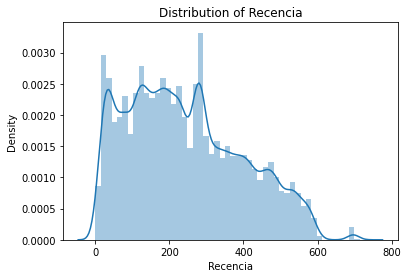

Recencia's: Skew: 0.4525739019900252, : SkewtestResult(statistic=53.917503973361256, pvalue=0.0)


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


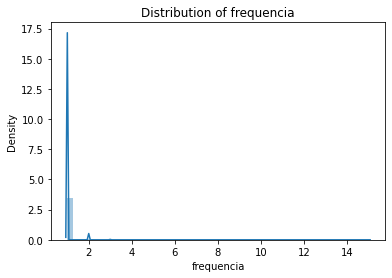

frequencia's: Skew: 10.990942154921314, : SkewtestResult(statistic=335.6456861541721, pvalue=0.0)


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


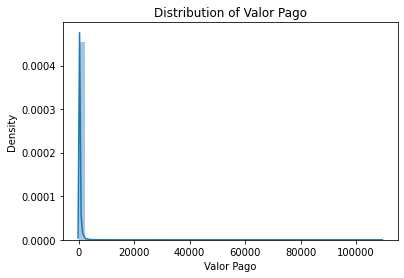

Valor Pago's: Skew: 70.33621193560055, : SkewtestResult(statistic=524.6379205104615, pvalue=0.0)


In [31]:
for col in df_rfm.columns[1:]:
  check_skew(df_rfm, col)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


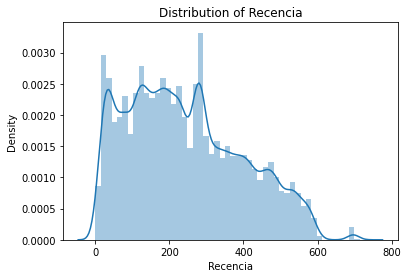

Recencia's: Skew: 0.4525739019900252, : SkewtestResult(statistic=53.917503973361256, pvalue=0.0)


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


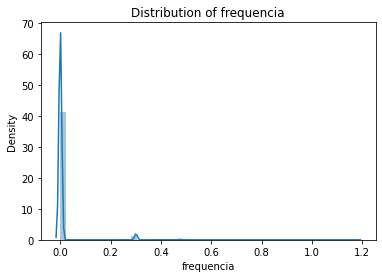

frequencia's: Skew: 6.068294981630156, : SkewtestResult(statistic=275.4417097222108, pvalue=0.0)


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


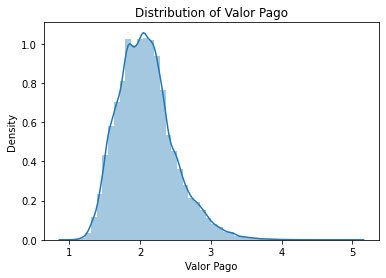

Valor Pago's: Skew: 0.729609897634013, : SkewtestResult(statistic=81.9204555191681, pvalue=0.0)


In [32]:
#utilizando a função log 

df_rfm_log = df_rfm.copy()
for c in df_rfm.columns[2:]:
    df_rfm_log[c] = np.log10(df_rfm_log[c])

for col in df_rfm.columns[1:]:
    check_skew(df_rfm_log, col)

In [33]:
standard = StandardScaler()
standard.fit(df_rfm_log.drop("Cliente_ID", axis=1))
df_rfm_array = standard.transform(df_rfm_log.drop("Cliente_ID", axis=1))

df_rfm_tabela = pd.DataFrame(data=df_rfm_array, columns=df_rfm_log.columns[1:])
df_rfm_tabela.head()


,Recencia,frequencia,Valor Pago
0,-0.826858,-0.172439,0.164274
1,-0.807271,-0.172439,-1.635774
2,1.954465,-0.172439,-0.378506
3,0.544216,-0.172439,-1.120834
4,0.328762,-0.172439,0.521090


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


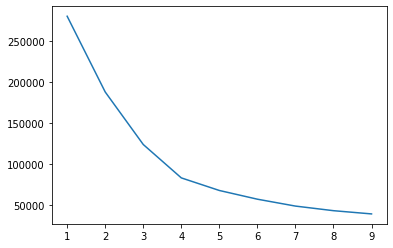

In [34]:
#Aplicando K-means e visualizando

d= []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(df_rfm_tabela)
    d.append(kmeanModel.inertia_)

gr = sns.lineplot(K, d)
plt.show()

In [35]:
#treinando o modelo
kmodel = KMeans(n_clusters = 4, random_state=5)
kmodel_y = kmodel.fit_predict(df_rfm_tabela)

#adicionando rotulos
df_rfm['cluster'] = kmodel.labels_

In [36]:
#Visualização cluster

def rfm_valor(df):
  df_novo = df.groupby(['cluster']).agg({
            'Recencia': 'mean',
            'frequencia': 'mean',
            'Valor Pago': ['mean', 'count']
    }).round(0)

  return df_novo

rfm_valor(df_rfm)

Recencia frequencia Valor Pago       
            mean       mean       mean  count
cluster                                      
0          146.0        1.0       82.0  40300
1          226.0        2.0      488.0   2807
2          426.0        1.0      124.0  27541
3          194.0        1.0      521.0  22748